In [2]:
## lets import the important libraries 
import pandas as pd 
import  numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
## lets load the dataset
df = pd.read_csv(r"C:\Users\pc\Downloads\churn1.csv" , encoding = "latin1")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## **DATA PREPROCESSING AND CLEANING**

In [4]:
df.shape 

(7043, 21)

In [5]:
df.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
print("The basic information regarding the data" , df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.duplicated().sum()
## no duplicates in the data 

np.int64(0)

In [8]:
df.isna().sum()
## no missing values in the data

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()
## descriptive statistics in the data 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
(df["gender"].value_counts()/7043)*100
## there are 50% of the males in the teecom company while 49% are females 

gender
Male      50.47565
Female    49.52435
Name: count, dtype: float64

In [11]:
(df["Contract"].value_counts()/7043)*100
## 55% customer have month to month 

Contract
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: count, dtype: float64

In [12]:
(df["Contract"].value_counts()/7043)*100

Contract
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: count, dtype: float64

In [13]:
(df["Dependents"].value_counts()/7043)*100

Dependents
No     70.041176
Yes    29.958824
Name: count, dtype: float64

In [14]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace({ 0 : "No" , 1 : "Yes"})

In [15]:
df["SeniorCitizen"].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df["tenure"].max()


np.int64(72)

In [17]:
def categorized_tenure(tenure):
    if tenure <= 12:
        return "1 Year"
    elif tenure <= 24:
        return "2 Year"
    elif tenure <= 36:
        return "3 Year"
    elif tenure <= 48:
        return "4 Year"
    elif tenure <= 60:
        return "5 Year"
    else:
        return "6 Year"
df["Tenure"] = df["tenure"].apply(categorized_tenure)
        

In [18]:
df["Tenure"].unique()

array(['1 Year', '3 Year', '4 Year', '2 Year', '6 Year', '5 Year'],
      dtype=object)

## **DATA VISUALIZATION**

### **1. HOW DOES GENDER INFLUENCE CHURN BEHAVIOR**

In [19]:
gender_churn = (df.groupby("gender")["Churn"].value_counts()/7043)*100
gender_churn
## TEKEAWAY 1 FEMALES ARE CHURNING MORE THAN THE MALES 

gender  Churn
Female  No       36.191964
        Yes      13.332387
Male    No       37.271049
        Yes      13.204600
Name: count, dtype: float64

C:\Users\pc\AppData\Local\Temp\ipykernel_17400\259731177.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  ax = sns.countplot( x = "gender" , hue = "Churn" , data = df, color = "purple")


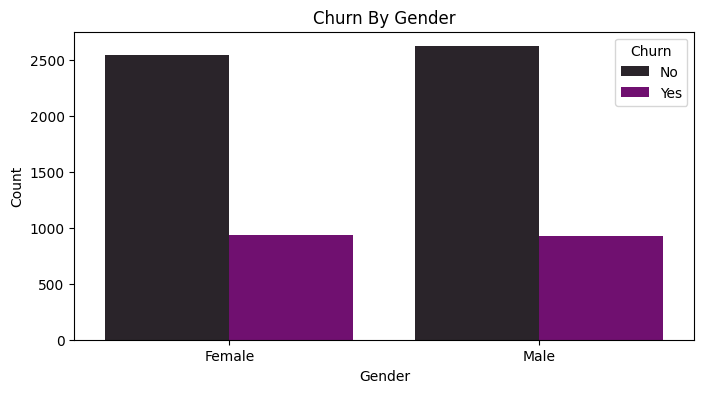

In [20]:
plt.figure(figsize = (8,4))
ax = sns.countplot( x = "gender" , hue = "Churn" , data = df, color = "purple")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churn By Gender")
plt.show()

### **2. CHURN BY SENIOR CITIZENS**

In [21]:
(df.groupby("SeniorCitizen")["Churn"].value_counts()/7043)*100


SeniorCitizen  Churn
No             No       64.006815
               Yes      19.778503
Yes            No        9.456198
               Yes       6.758484
Name: count, dtype: float64

C:\Users\pc\AppData\Local\Temp\ipykernel_17400\2647291684.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  ax = sns.countplot( x = "SeniorCitizen" , hue = "Churn" , data = df, color = "purple")


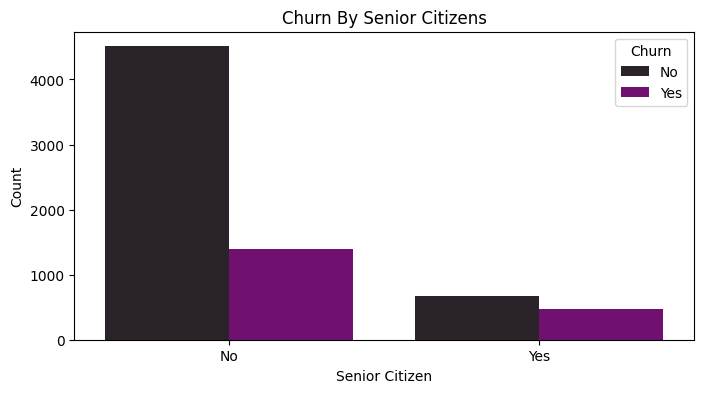

In [22]:
plt.figure(figsize = (8,4))
ax = sns.countplot( x = "SeniorCitizen" , hue = "Churn" , data = df, color = "purple")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.title("Churn By Senior Citizens")
plt.show()

### **3. CHURN BY PARTNER**

In [23]:
(df.groupby("Partner")["Churn"].value_counts()/7043)*100
## TAAKEAWAY 2 - CUSTOMERS WITH NO PARTNERS WITH THEM ARE CHURNNING MORE (17% ARE CHURNING)


Partner  Churn
No       No       34.658526
         Yes      17.038194
Yes      No       38.804487
         Yes       9.498793
Name: count, dtype: float64

C:\Users\pc\AppData\Local\Temp\ipykernel_17400\3261949247.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  ax = sns.countplot( x = "Partner" , hue = "Churn" , data = df, color = "purple")


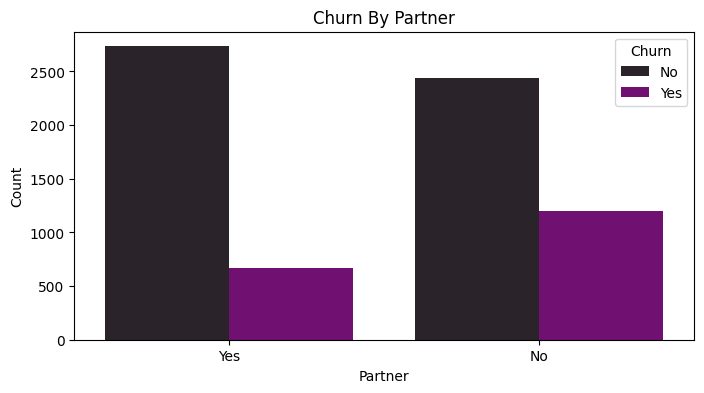

In [24]:
plt.figure(figsize = (8,4))
ax = sns.countplot( x = "Partner" , hue = "Churn" , data = df, color = "purple")
plt.xlabel("Partner")
plt.ylabel("Count")
plt.title("Churn By Partner")
plt.show()

### **4. CHURN BY TENURE**

In [25]:
(df.groupby("Tenure")["Churn"].value_counts()/7043)*100
##TAKEAWAY 3 - CUSTOMERS HAVING 1 YEAR TENURE ARE CHURNING MORE THAN THE CUSOMERS HAVIHNG 6 YEAR TENURE (14% ARE CHURNING WITH 1 YEAR TENURE )

Tenure  Churn
1 Year  No       16.314071
        Yes      14.723839
2 Year  No       10.364901
        Yes       4.174358
3 Year  No        9.257419
        Yes       2.555729
4 Year  No        8.760471
        Yes       2.058782
5 Year  No       10.109328
        Yes       1.703819
6 Year  No       18.656822
        Yes       1.320460
Name: count, dtype: float64

C:\Users\pc\AppData\Local\Temp\ipykernel_17400\2863957506.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  ax = sns.countplot( x = "Tenure" , hue = "Churn" , data = df, color = "purple")


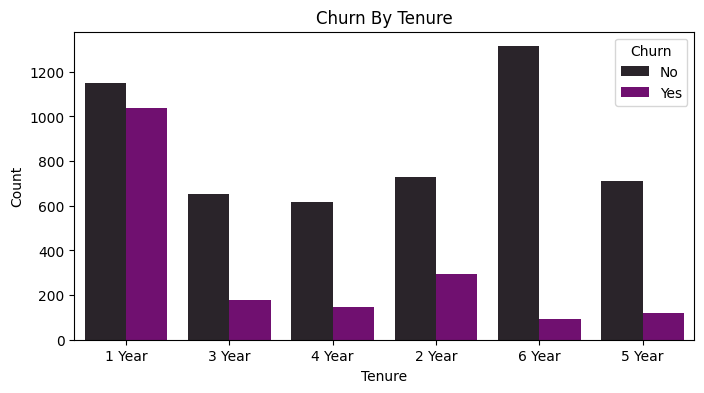

In [26]:
plt.figure(figsize = (8,4))
ax = sns.countplot( x = "Tenure" , hue = "Churn" , data = df, color = "purple")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.title("Churn By Tenure")
plt.show()

In [27]:
(df.groupby("Contract")["Churn"].value_counts()/7043)*100
## TAKEAWAY 4- CUSTOMERS ARE CHURNING MORE WITH HVING MONTH TO MONTH CONTRACT (23% ARE CHURNING WITH HAVING MONTH TO MONTH CONTRACT)

Contract        Churn
Month-to-month  No       31.520659
                Yes      23.498509
One year        No       18.557433
                Yes       2.356950
Two year        No       23.384921
                Yes       0.681528
Name: count, dtype: float64

C:\Users\pc\AppData\Local\Temp\ipykernel_17400\3427400471.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  ax = sns.countplot( x = "Contract" , hue = "Churn" , data = df, color = "purple")


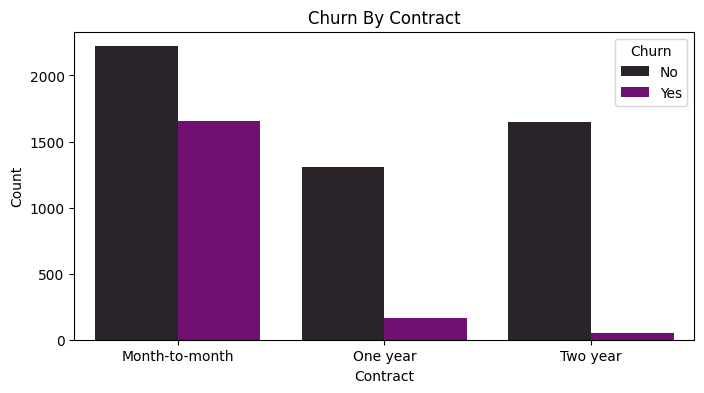

In [28]:
plt.figure(figsize = (8,4))
ax = sns.countplot( x = "Contract" , hue = "Churn" , data = df, color = "purple")
plt.xlabel("Contract")
plt.ylabel("Count")
plt.title("Churn By Contract")
plt.show()

### **5. CHURN BY PAYMENT METHOD**

In [29]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Tenure'],
      dtype='object')

In [30]:
(df.groupby("PaymentMethod")["Churn"].value_counts()/7043)*100
## TAKEAWAY 5 -  CUSTOMERS PAYING WITH ELECTRONIC CHECK ARE CHUNRING MORE (15% ARE CHURNING IN ELECTRONIC CHECK)

PaymentMethod              Churn
Bank transfer (automatic)  No       18.259265
                           Yes       3.663212
Credit card (automatic)    No       18.316058
                           Yes       3.294051
Electronic check           No       18.372852
                           Yes      15.206588
Mailed check               No       18.514837
                           Yes       4.373136
Name: count, dtype: float64

C:\Users\pc\AppData\Local\Temp\ipykernel_17400\3936529378.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  ax = sns.countplot( x = "PaymentMethod" , hue = "Churn" , data = df, color = "purple")


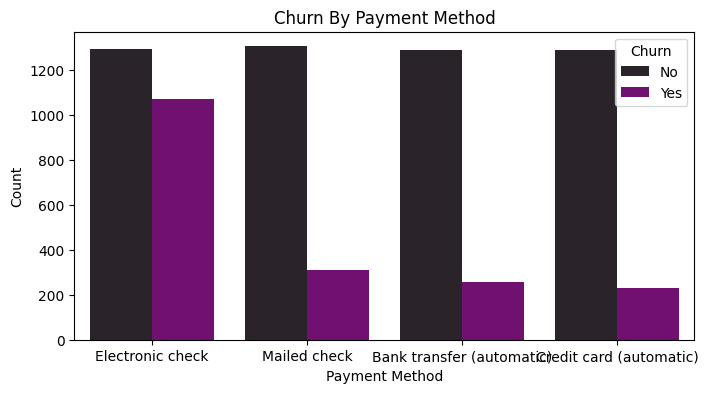

In [31]:
plt.figure(figsize = (8,4))
ax = sns.countplot( x = "PaymentMethod" , hue = "Churn" , data = df, color = "purple")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Churn By Payment Method")
plt.show()

### **6. SUBPLOTS OF SUBSCRIPTION METHODS**

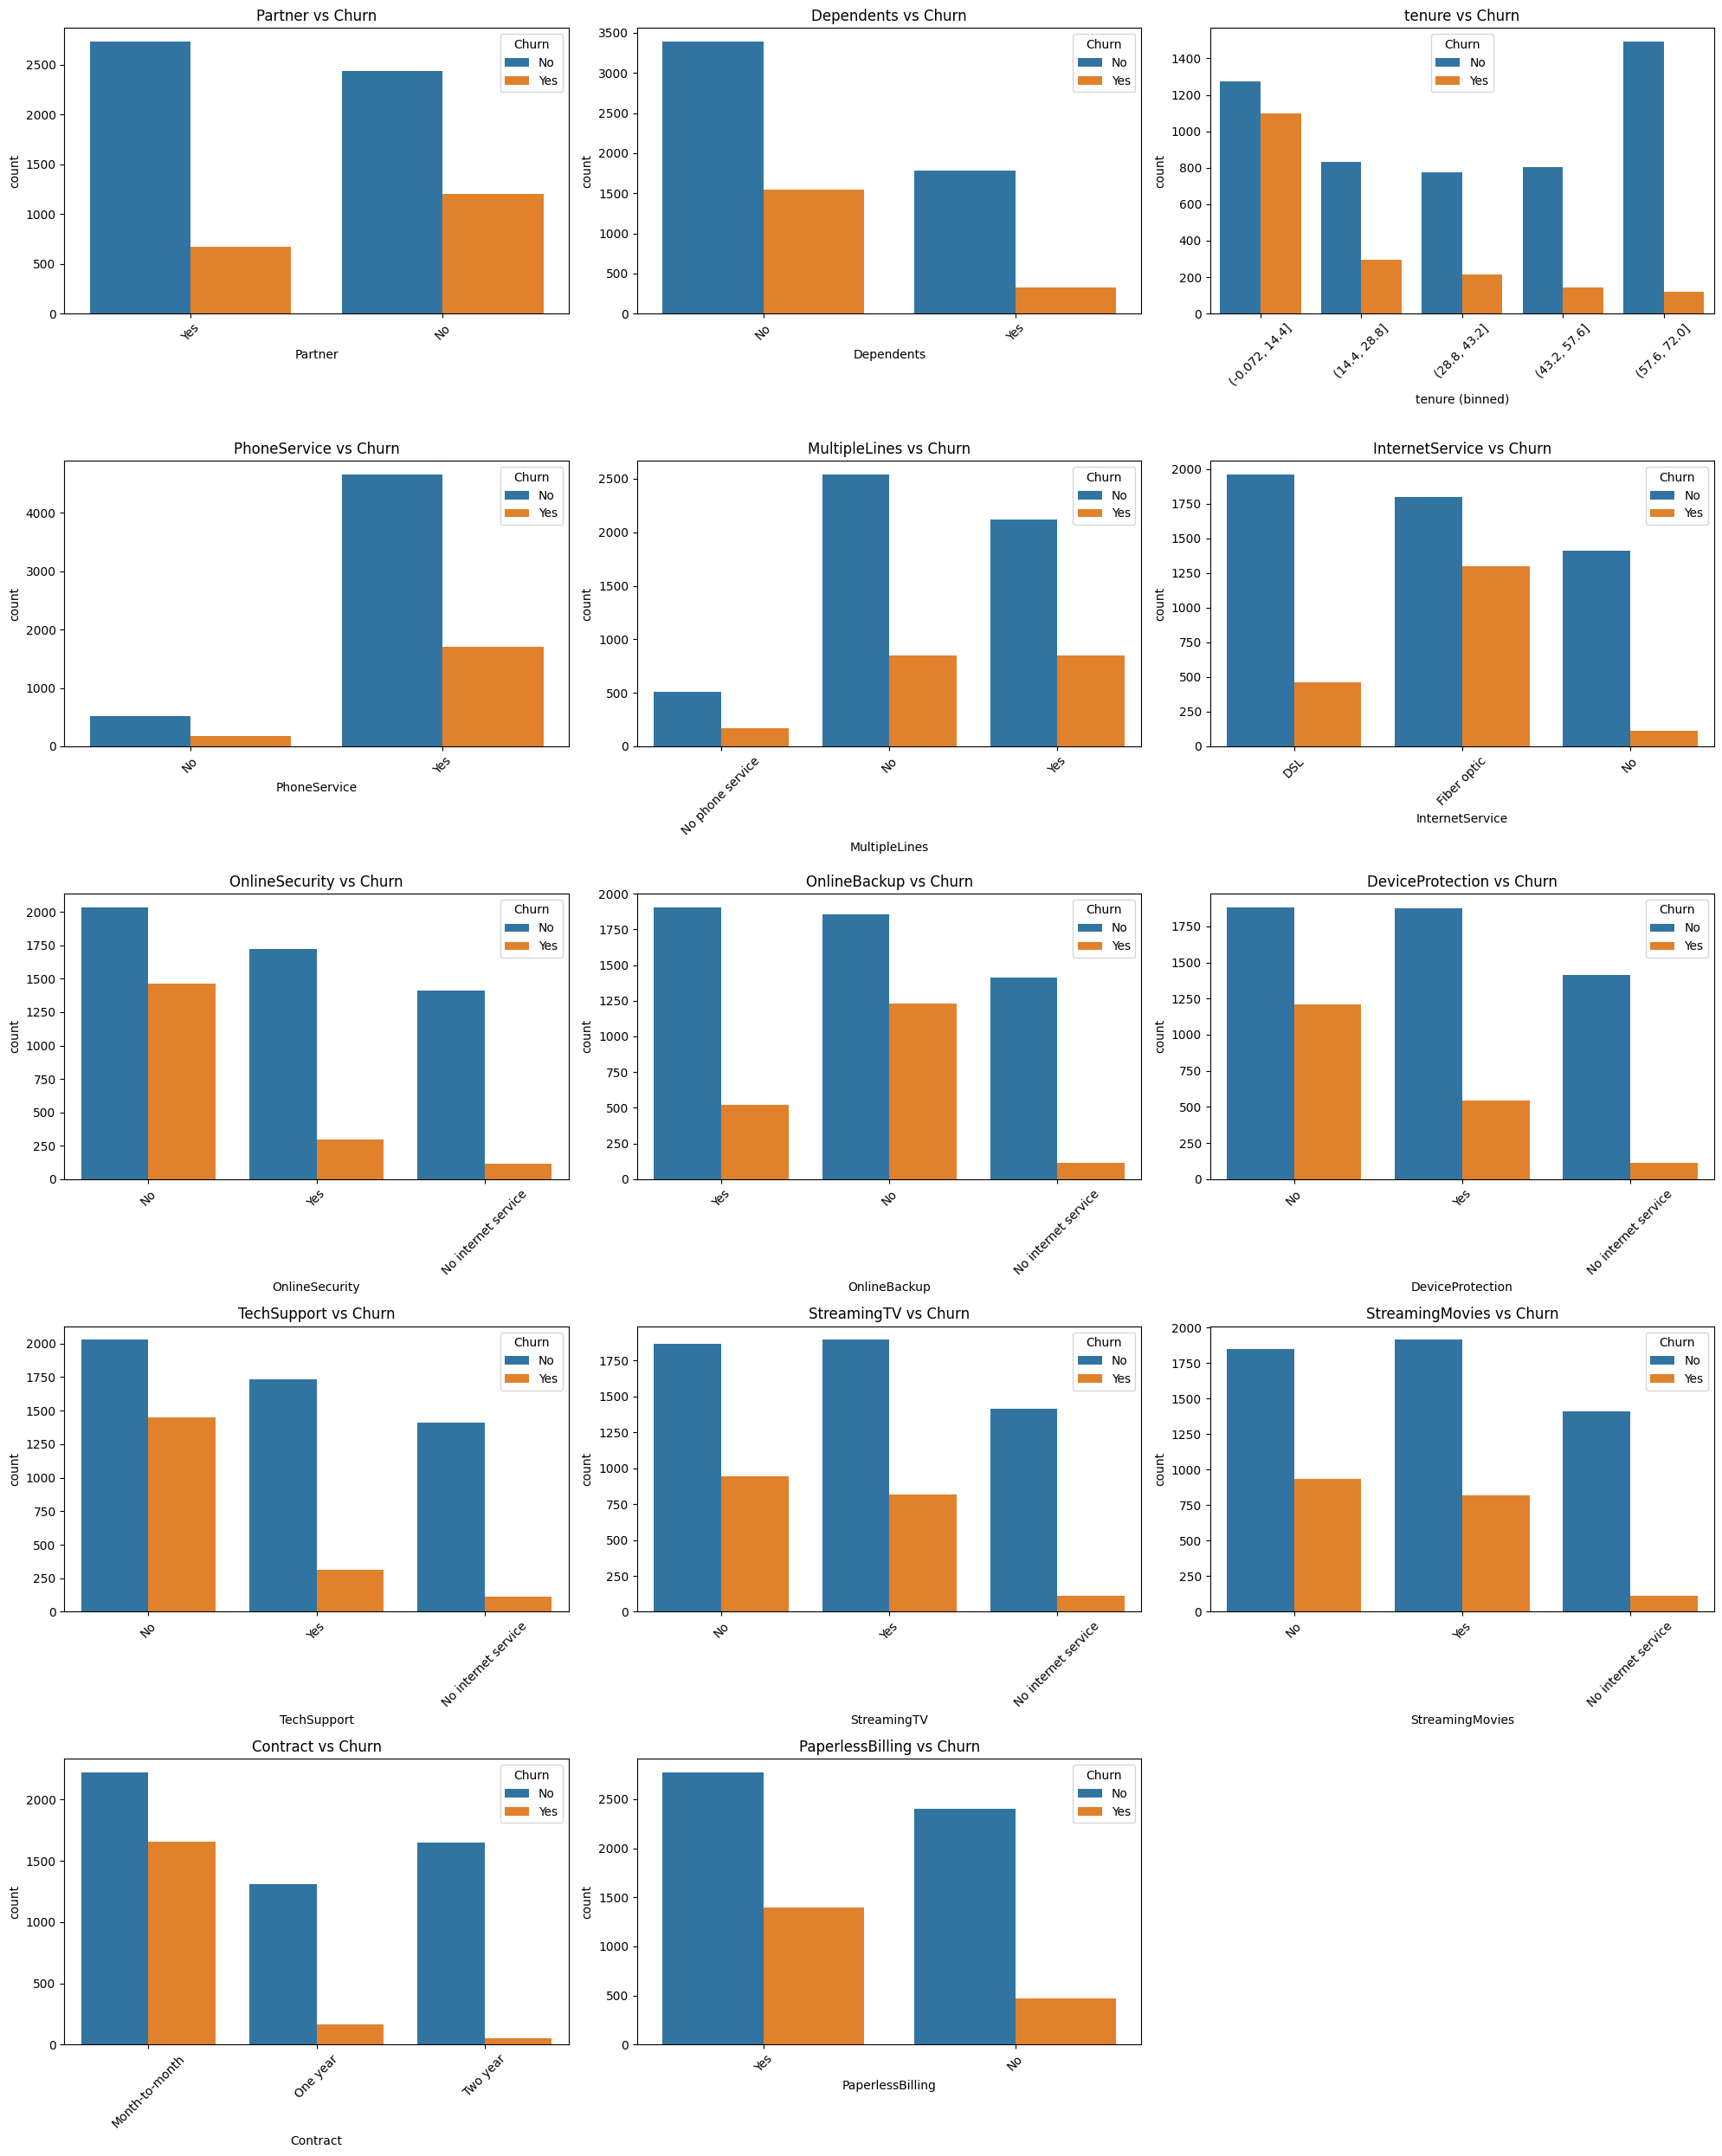

In [32]:
churn_col = 'Churn'  # change this if your name is different



features = [
    'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling'
]

n_cols = 3
n_rows = -(-len(features) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    if col == 'tenure':
        df['tenure_binned'] = pd.cut(df[col], bins=5)
        sns.countplot(data=df, x='tenure_binned', hue=churn_col, ax=axes[i])
        axes[i].set_xlabel('tenure (binned)')
    else:
        sns.countplot(data=df, x=col, hue=churn_col, ax=axes[i])

    axes[i].set_title(f'{col} vs {churn_col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [33]:
df.to_csv(r"C:\Users\pc\Downloads\churn1.csv", index=False)

## **KEY INSIGHTS**

## 1. FEMALES ARE CHURNING MORE THAN THE MALES 

## 2. CUSTOMERS HAVING NO PARTNERS ARE CHURNING MORE 17%

## 3. CHUSTOMERS HAVING 1 YEAR TENURE ARE CHURNING MORE THAN THE OTHER TENURE 

## 4. CUSTOMERS HAVING MONTH TO MONTH CONTRACT ARE CHUNRING MORE 

## 5. CUSTOMERS PAAYING WITH ELECTRONIC CHECK  ARE CHURNING IN HIGH NUMBERS THAN THE OTHER PAYMENT METHOD 

## 6. CUSTOMERS WHO HAVE PHONE SERVICES ARE CHURNING MORE (NEED TO LOOK INTO THIS)

## 7. CUSTOMERS WHO HAVE INTERNET SERVICE AS FIBER OPTICS ARE CHURNING IN MORE NMBERS THAN THE OTHER INTERNET SERVICES 

## 8. CUSTOMERS HAVING PAPERLESS BILLING ARE CHURNING MORE 

## 9. LACK OF ONLINE SECURITY STRONGLY INCREASE CHURN 

## 10. LACK OF TECH SUPPORT SERVICE INCREASES CHURN RATE 